In [1]:
from trie import Trie, TrieVisualizer
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# 3.1

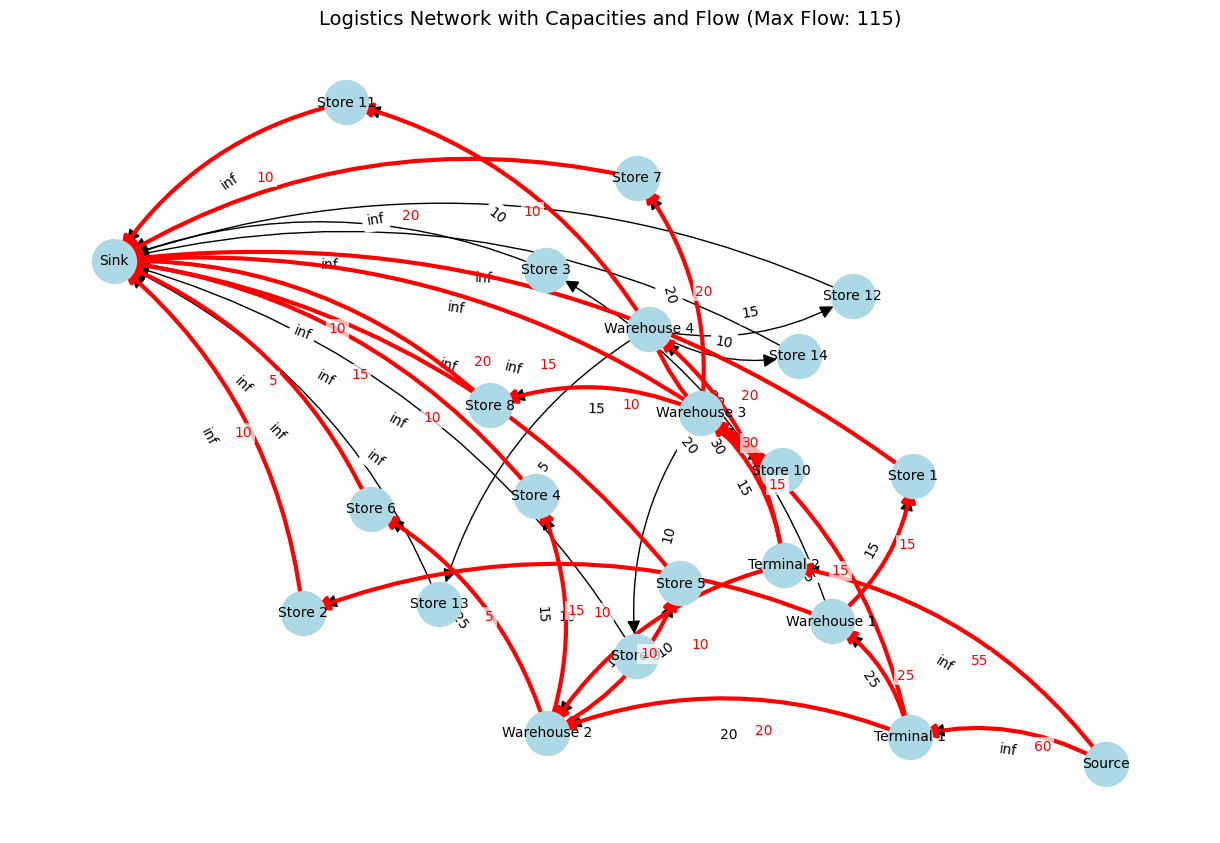

🔹 Maximum Flow Through the Network: 115

📊 Flow Distribution Between Nodes:

➡️ Terminal 1:
    → Warehouse 1: 25
    → Warehouse 2: 20
    → Warehouse 3: 15

➡️ Warehouse 1:
    → Store 1: 15
    → Store 2: 10

➡️ Warehouse 2:
    → Store 4: 15
    → Store 5: 10
    → Store 6: 5

➡️ Warehouse 3:
    → Store 7: 20
    → Store 8: 10

➡️ Terminal 2:
    → Warehouse 3: 15
    → Warehouse 4: 30
    → Warehouse 2: 10

➡️ Warehouse 4:
    → Store 10: 20
    → Store 11: 10

➡️ Store 1:
    → Sink: 15

➡️ Store 2:
    → Sink: 10

➡️ Store 4:
    → Sink: 15

➡️ Store 5:
    → Sink: 10

➡️ Store 6:
    → Sink: 5

➡️ Store 7:
    → Sink: 20

➡️ Store 8:
    → Sink: 10

➡️ Store 10:
    → Sink: 20

➡️ Store 11:
    → Sink: 10

➡️ Source:
    → Terminal 1: 60
    → Terminal 2: 55

📈 Edge Utilization:
    Terminal 1 → Warehouse 1: 100.00% (25/25)
    Terminal 1 → Warehouse 2: 100.00% (20/20)
    Terminal 1 → Warehouse 3: 100.00% (15/15)
    Warehouse 1 → Store 1: 100.00% (15/15)
    Warehouse 1 → St

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the names of the nodes in the graph
terminals = ["Terminal 1", "Terminal 2"]
warehouses = ["Warehouse 1", "Warehouse 2", "Warehouse 3", "Warehouse 4"]
stores = ["Store 1", "Store 2", "Store 3", "Store 4", "Store 5",
          "Store 6", "Store 7", "Store 8", "Store 9", "Store 10",
          "Store 11", "Store 12", "Store 13", "Store 14"]

# All edges of the graph with capacities
edges = [
    ("Terminal 1", "Warehouse 1", 25),
    ("Terminal 1", "Warehouse 2", 20),
    ("Terminal 1", "Warehouse 3", 15),
    ("Terminal 2", "Warehouse 3", 15),
    ("Terminal 2", "Warehouse 4", 30),
    ("Terminal 2", "Warehouse 2", 10),
    ("Warehouse 1", "Store 1", 15),
    ("Warehouse 1", "Store 2", 10),
    ("Warehouse 1", "Store 3", 20),
    ("Warehouse 2", "Store 4", 15),
    ("Warehouse 2", "Store 5", 10),
    ("Warehouse 2", "Store 6", 25),
    ("Warehouse 3", "Store 7", 20),
    ("Warehouse 3", "Store 8", 15),
    ("Warehouse 3", "Store 9", 10),
    ("Warehouse 4", "Store 10", 20),
    ("Warehouse 4", "Store 11", 10),
    ("Warehouse 4", "Store 12", 15),
    ("Warehouse 4", "Store 13", 5),
    ("Warehouse 4", "Store 14", 10),
]

# Add artificial nodes (source and sink)
source = "Source"
sink = "Sink"

# Build the graph
G = nx.DiGraph()

# Add the real connections
for start, end, capacity in edges:
    G.add_edge(start, end, capacity=capacity)

# Add artificial connections from the source to the terminals
for terminal in terminals:
    G.add_edge(source, terminal, capacity=float("inf"))

# Add artificial connections from the stores to the sink
for store in stores:
    G.add_edge(store, sink, capacity=float("inf"))

# Function to find the maximum flow (Edmonds-Karp)
def max_flow_edmonds_karp(G, source, sink):
    flow_value, flow_dict = nx.maximum_flow(G, source, sink, flow_func=nx.algorithms.flow.edmonds_karp)
    return flow_value, flow_dict

# Calculate the maximum flow
max_flow, flow_distribution = max_flow_edmonds_karp(G, source, sink)


plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Draw the base graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1000, font_size=10, font_color='black',
        arrowsize=20, arrowstyle='-|>',
        connectionstyle="arc3,rad=0.2") 

# Draw capacities on edges
edge_labels = { (u, v): f"{data['capacity']}" for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Draw flow on edges (only if flow > 0)
for u, v, data in G.edges(data=True):
    flow = flow_distribution.get(u, {}).get(v, 0)  # Prevent KeyError
    if flow > 0:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], 
                               edge_color='red', width=3,
                               arrowsize=20, arrowstyle='-|>',
                               connectionstyle="arc3,rad=0.2")  # Highlight edges carrying flow
        # Adjust flow label position
        x, y = (pos[u][0] + pos[v][0]) / 2 + 0.05, (pos[u][1] + pos[v][1]) / 2
        plt.text(x, y, f"{flow}", color='red', fontsize=10, 
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2)) 

plt.title(f"Logistics Network with Capacities and Flow (Max Flow: {max_flow})", fontsize=14)
plt.show()


print(f"🔹 Maximum Flow Through the Network: {max_flow}\n")
print("📊 Flow Distribution Between Nodes:")

# Organize flow distribution for better reporting
flow_summary = defaultdict(dict)
for start, flows in flow_distribution.items():
    for end, flow in flows.items():
        if flow > 0:
            flow_summary[start][end] = flow

for start, destinations in flow_summary.items():
    print(f"\n➡️ {start}:")
    for end, flow in destinations.items():
        print(f"    → {end}: {flow}") 

# Calculate and report utilization
print("\n📈 Edge Utilization:")
for u, v, data in G.edges(data=True):
    capacity = data['capacity']
    flow = flow_distribution.get(u, {}).get(v, 0)  # Prevent KeyError
    utilization = (flow / capacity) * 100 if capacity > 0 else 0
    print(f"    {u} → {v}: {utilization:.2f}% ({flow}/{capacity})")


Initial network structure:


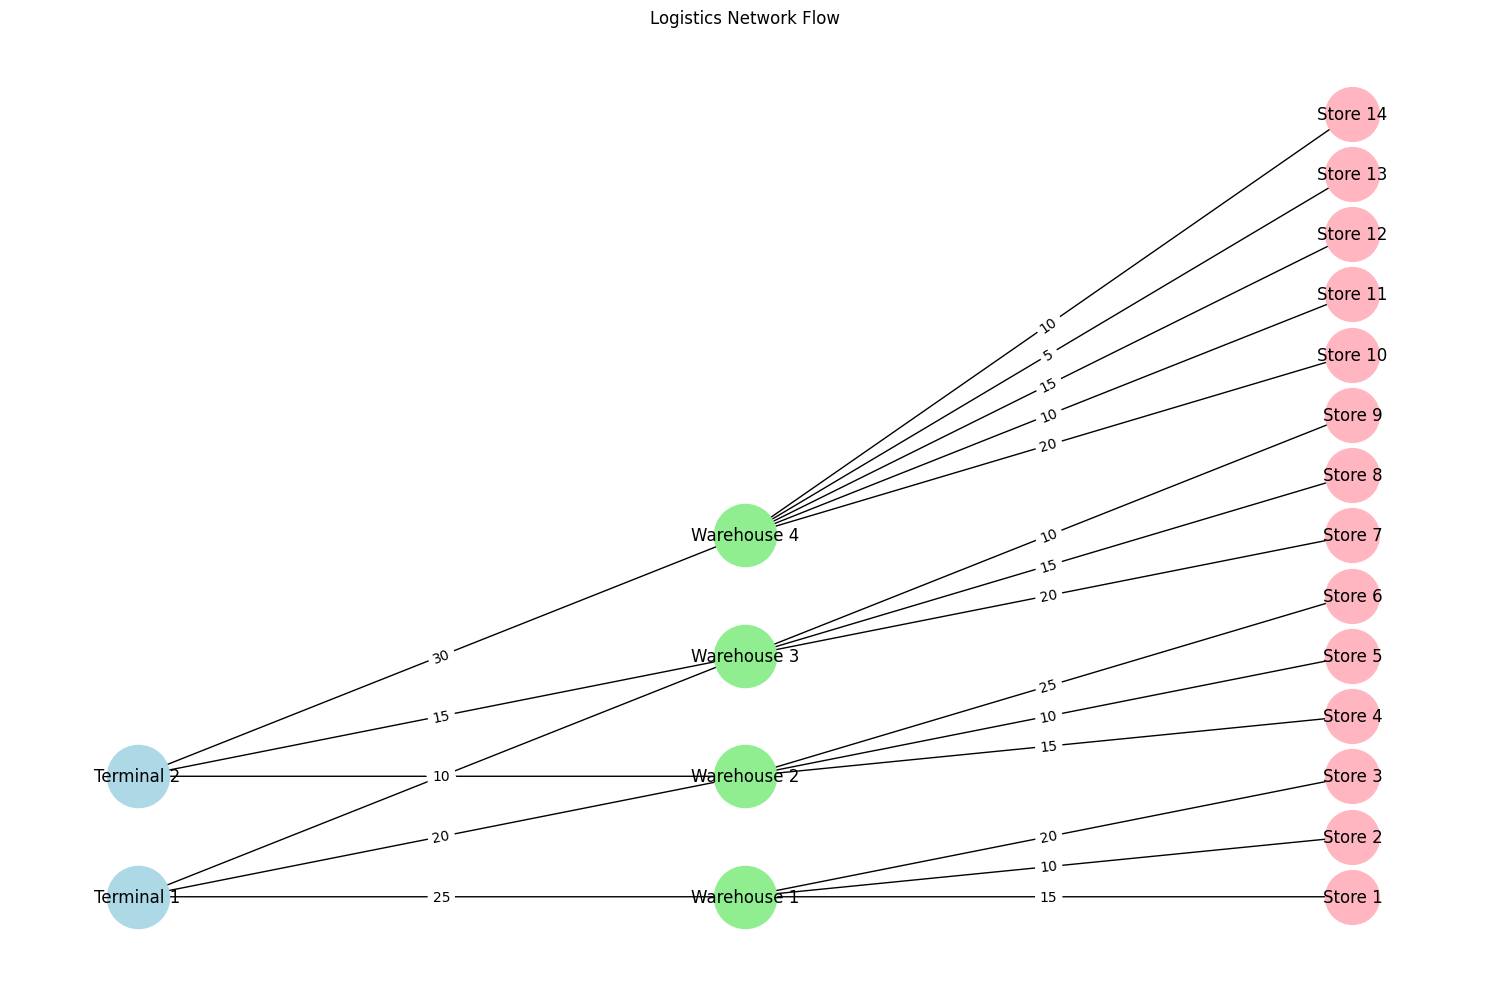


Total maximum flow: 115 units

Network with flows:


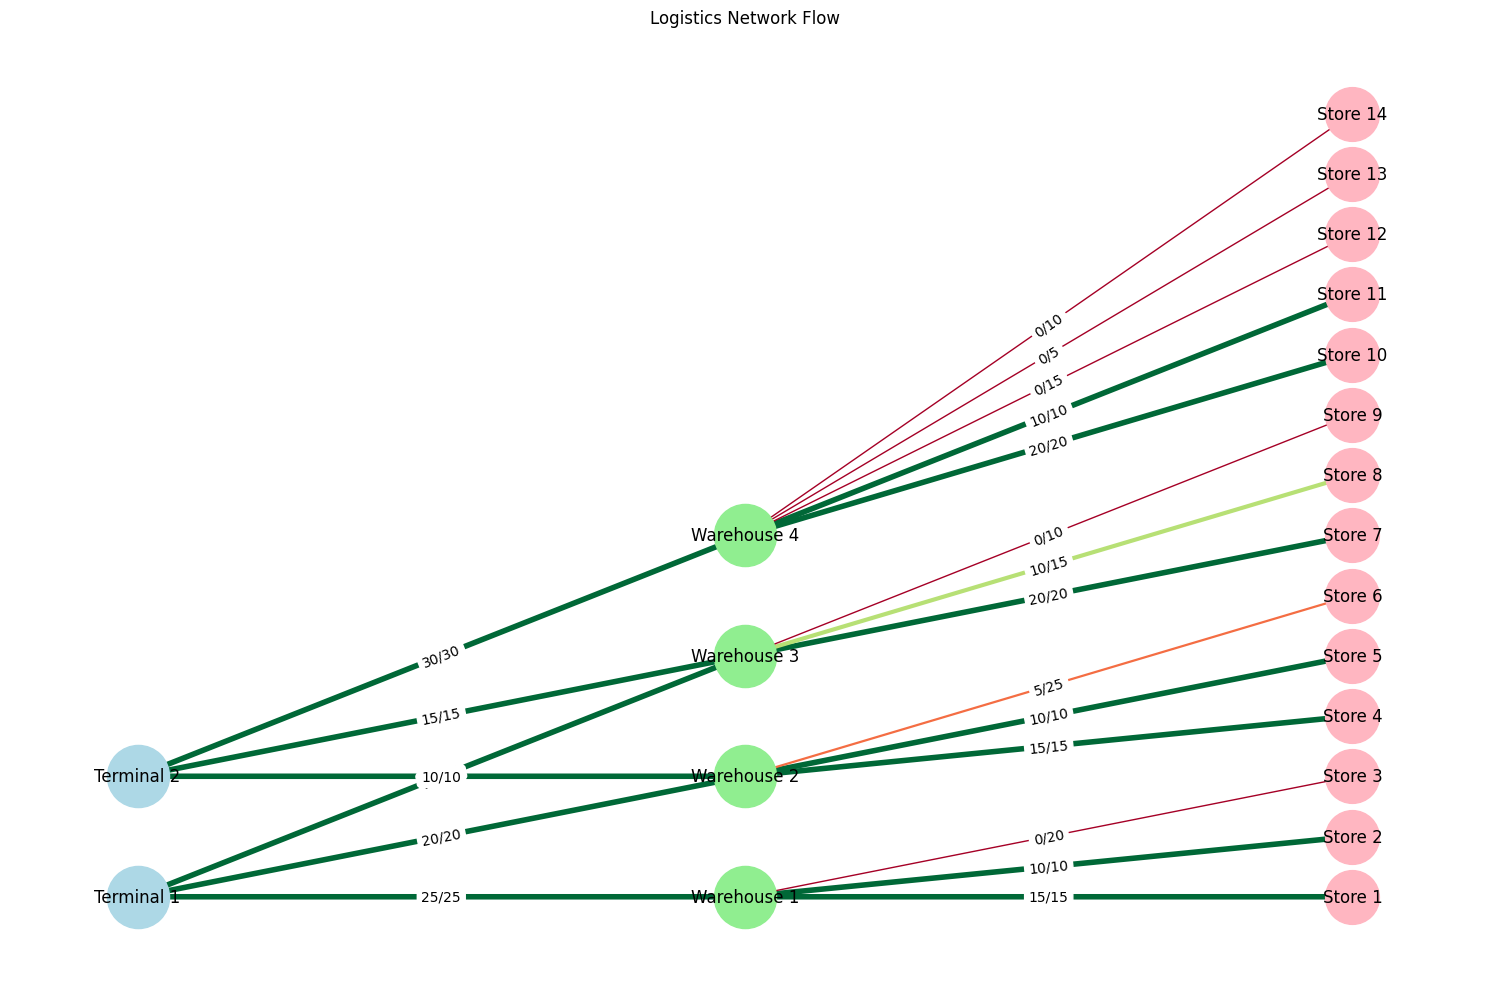


Flow Table:
--------------------------------------------------
Terminal       Store          Flow      
--------------------------------------------------
Terminal 1     Store 1        15        
Terminal 1     Store 2        10        
Terminal 1     Store 4        15        
Terminal 1     Store 5        10        
Terminal 1     Store 6        5         
Terminal 1     Store 7        15        
Terminal 1     Store 8        10        
Terminal 2     Store 10       20        
Terminal 2     Store 11       10        
Terminal 2     Store 4        10        
Terminal 2     Store 5        10        
Terminal 2     Store 6        5         
Terminal 2     Store 7        15        
Terminal 2     Store 8        10        
--------------------------------------------------

Network Analysis:
--------------------------------------------------

1. Terminal Analysis:
Terminal 1: Total flow = 80 units
Terminal 2: Total flow = 80 units

2. Store Analysis:
Stores with lowest supply:
Store 2: 10

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

class LogisticsNetwork:
    def __init__(self):
        # Initialize the graph
        self.graph = nx.DiGraph()
        
        # Add nodes
        self.terminals = ["Terminal 1", "Terminal 2"]
        self.warehouses = [f"Warehouse {i}" for i in range(1, 5)]
        self.stores = [f"Store {i}" for i in range(1, 15)]
        
        # Add all nodes to the graph
        self.graph.add_nodes_from(self.terminals)
        self.graph.add_nodes_from(self.warehouses)
        self.graph.add_nodes_from(self.stores)
        
        # Define edges with capacities
        self.edges = [
            # Terminal 1 to Warehouses
            ("Terminal 1", "Warehouse 1", 25),
            ("Terminal 1", "Warehouse 2", 20),
            ("Terminal 1", "Warehouse 3", 15),
            # Terminal 2 to Warehouses
            ("Terminal 2", "Warehouse 3", 15),
            ("Terminal 2", "Warehouse 4", 30),
            ("Terminal 2", "Warehouse 2", 10),
            # Warehouse 1 to Stores
            ("Warehouse 1", "Store 1", 15),
            ("Warehouse 1", "Store 2", 10),
            ("Warehouse 1", "Store 3", 20),
            # Warehouse 2 to Stores
            ("Warehouse 2", "Store 4", 15),
            ("Warehouse 2", "Store 5", 10),
            ("Warehouse 2", "Store 6", 25),
            # Warehouse 3 to Stores
            ("Warehouse 3", "Store 7", 20),
            ("Warehouse 3", "Store 8", 15),
            ("Warehouse 3", "Store 9", 10),
            # Warehouse 4 to Stores
            ("Warehouse 4", "Store 10", 20),
            ("Warehouse 4", "Store 11", 10),
            ("Warehouse 4", "Store 12", 15),
            ("Warehouse 4", "Store 13", 5),
            ("Warehouse 4", "Store 14", 10),
        ]
        
        # Add edges to the graph
        for source, target, capacity in self.edges:
            self.graph.add_edge(source, target, capacity=capacity)
    
    def calculate_maximum_flow(self):
        """Calculate maximum flow for each terminal to all stores"""
        # Create a super source and super sink
        self.graph.add_node("Source")
        self.graph.add_node("Sink")
        
        # Connect source to terminals
        for terminal in self.terminals:
            self.graph.add_edge("Source", terminal, capacity=float('inf'))
        
        # Connect stores to sink
        for store in self.stores:
            self.graph.add_edge(store, "Sink", capacity=float('inf'))
        
        # Calculate maximum flow
        flow_value, flow_dict = nx.maximum_flow(self.graph, "Source", "Sink")
        
        # Remove super source and sink
        self.graph.remove_node("Source")
        self.graph.remove_node("Sink")
        
        return flow_value, flow_dict
    
    def analyze_flows(self, flow_dict):
        """Analyze and format the flow results"""
        terminal_store_flows = defaultdict(dict)
        
        def trace_flow(terminal, current, visited=None, flow=float('inf')):
            if visited is None:
                visited = set()
            
            if current in self.stores:
                min_flow = min(flow_dict[prev][current] for prev in flow_dict if current in flow_dict[prev])
                terminal_store_flows[terminal][current] = min(flow, min_flow)
                return
            
            visited.add(current)
            for next_node in flow_dict[current]:
                if next_node not in visited and flow_dict[current][next_node] > 0:
                    trace_flow(terminal, next_node, visited, min(flow, flow_dict[current][next_node]))
        
        # Trace flows from each terminal
        for terminal in self.terminals:
            trace_flow(terminal, terminal)
        
        return terminal_store_flows
    
    def visualize_network(self, flow_dict=None):
        """Visualize the network with optional flow information"""
        plt.figure(figsize=(15, 10))
        
        # Define node positions
        pos = {
            **{t: (0, i) for i, t in enumerate(self.terminals)},
            **{w: (1, i) for i, w in enumerate(self.warehouses)},
            **{s: (2, i/2) for i, s in enumerate(self.stores)}
        }
        
        # Draw nodes
        nx.draw_networkx_nodes(self.graph, pos, 
                             nodelist=self.terminals, 
                             node_color='lightblue',
                             node_size=2000)
        nx.draw_networkx_nodes(self.graph, pos, 
                             nodelist=self.warehouses,
                             node_color='lightgreen',
                             node_size=2000)
        nx.draw_networkx_nodes(self.graph, pos,
                             nodelist=self.stores,
                             node_color='lightpink',
                             node_size=1500)
        
        # Draw edges
        if flow_dict:
            edge_colors = []
            edge_widths = []
            for u, v, data in self.graph.edges(data=True):
                flow = flow_dict[u][v] if v in flow_dict.get(u, {}) else 0
                capacity = data['capacity']
                utilization = flow / capacity if capacity > 0 else 0
                edge_colors.append(plt.cm.RdYlGn(utilization))
                edge_widths.append(1 + 3 * utilization)
            
            nx.draw_networkx_edges(self.graph, pos, 
                                 edge_color=edge_colors,
                                 width=edge_widths)
        else:
            nx.draw_networkx_edges(self.graph, pos)
        
        # Add labels
        nx.draw_networkx_labels(self.graph, pos)
        edge_labels = nx.get_edge_attributes(self.graph, 'capacity')
        if flow_dict:
            edge_labels = {(u,v): f"{flow_dict[u].get(v, 0)}/{data['capacity']}"
                         for u, v, data in self.graph.edges(data=True)}
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels)
        
        plt.title("Logistics Network Flow")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

def print_flow_table(flows):
    """Print formatted flow table"""
    print("\nFlow Table:")
    print("-" * 50)
    print(f"{'Terminal':<15}{'Store':<15}{'Flow':<10}")
    print("-" * 50)
    
    for terminal in sorted(flows.keys()):
        for store in sorted(flows[terminal].keys()):
            print(f"{terminal:<15}{store:<15}{flows[terminal][store]:<10.0f}")
    print("-" * 50)

def analyze_network(flows):
    """Analyze network characteristics"""
    print("\nNetwork Analysis:")
    print("-" * 50)
    
    # Terminal analysis
    terminal_totals = defaultdict(float)
    for terminal in flows:
        terminal_totals[terminal] = sum(flows[terminal].values())
    
    print("\n1. Terminal Analysis:")
    for terminal, total in sorted(terminal_totals.items(), key=lambda x: x[1], reverse=True):
        print(f"{terminal}: Total flow = {total:.0f} units")
    
    # Store analysis
    store_totals = defaultdict(float)
    for terminal in flows:
        for store, flow in flows[terminal].items():
            store_totals[store] += flow
    
    print("\n2. Store Analysis:")
    min_flow_stores = sorted(store_totals.items(), key=lambda x: x[1])[:3]
    print("Stores with lowest supply:")
    for store, flow in min_flow_stores:
        print(f"{store}: {flow:.0f} units")

if __name__ == "__main__":
    # Create and analyze network
    network = LogisticsNetwork()
    
    print("Initial network structure:")
    network.visualize_network()
    
    # Calculate maximum flow
    flow_value, flow_dict = network.calculate_maximum_flow()
    print(f"\nTotal maximum flow: {flow_value:.0f} units")
    
    # Visualize network with flows
    print("\nNetwork with flows:")
    network.visualize_network(flow_dict)
    
    # Analyze results
    terminal_store_flows = network.analyze_flows(flow_dict)
    print_flow_table(terminal_store_flows)
    analyze_network(terminal_store_flows)

In [3]:
## 3.2

File generated_items_data.csv not found. Generating sample data instead.
Generated 10000 sample items

Loading data into structures...
Loading completed in 0.0561 seconds

Performing 100 range queries on each structure...

Benchmark Results:
--------------------------------------------------
Total range_query time for OOBTree: 0.443488 seconds
Total range_query time for Dict: 0.225456 seconds
Average query time for OOBTree: 0.004430 seconds
Average query time for Dict: 0.002250 seconds
Speed difference: Dictionary is 1.97x slower than OOBTree
--------------------------------------------------


/tmp/ipykernel_19541/1667837987.py:130: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tree_times, dict_times], labels=['OOBTree', 'Dictionary'])


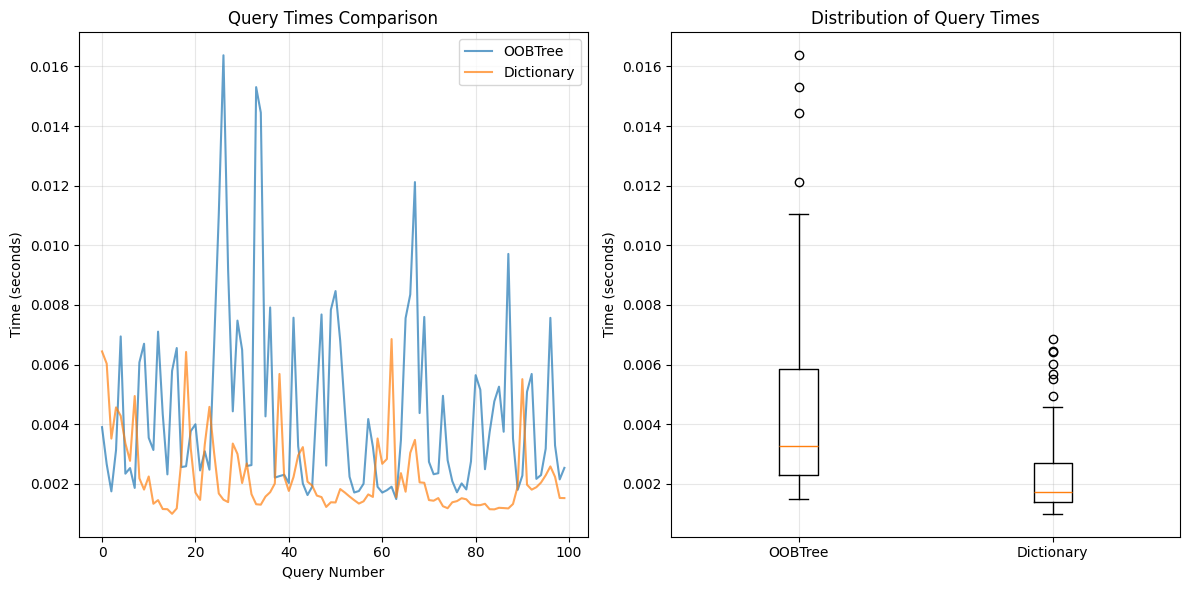


Detailed Analysis:
--------------------------------------------------
1. Memory Usage:
OOBTree size: 560,000 bytes
Dictionary size: 295,000 bytes

2. Query Characteristics:
Maximum query time (OOBTree): 0.016376 seconds
Maximum query time (Dictionary): 0.006854 seconds
Minimum query time (OOBTree): 0.001486 seconds
Minimum query time (Dictionary): 0.000992 seconds

3. Performance Analysis:
OOBTree advantages:
- Optimized for range queries
- Maintains sorted order
- Better for large datasets

Dictionary advantages:
- Faster for single item lookups
- Less memory overhead for small datasets
- Simpler implementation


In [12]:
from BTrees.OOBTree import OOBTree
import csv
import time
import timeit
import matplotlib.pyplot as plt
from typing import Dict, List, Any
import random

class DataStructureComparison:
    def __init__(self):
        self.tree = OOBTree()
        self.dict = {}
        self.data = []
        
    def load_data(self, filename: str) -> None:
        """Load data from CSV file"""
        try:
            with open(filename, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                self.data = list(reader)
                print(f"Loaded {len(self.data)} items from {filename}")
        except FileNotFoundError:
            print(f"File {filename} not found. Generating sample data instead.")
            self.generate_sample_data()
    
    def generate_sample_data(self, num_items: int = 10000) -> None:
        """Generate sample data if CSV file is not available"""
        categories = ["Electronics", "Clothing", "Food", "Books", "Sports"]
        for i in range(num_items):
            item = {
                "ID": str(i),
                "Name": f"Product {i}",
                "Category": random.choice(categories),
                "Price": str(random.uniform(10, 1000))
            }
            self.data.append(item)
        print(f"Generated {num_items} sample items")
    
    def add_item_to_tree(self, item: Dict[str, Any]) -> None:
        """Add item to OOBTree structure"""
        self.tree[int(item["ID"])] = {
            "name": item["Name"],
            "category": item["Category"],
            "price": float(item["Price"])
        }
    
    def add_item_to_dict(self, item: Dict[str, Any]) -> None:
        """Add item to dictionary structure"""
        self.dict[int(item["ID"])] = {
            "name": item["Name"],
            "category": item["Category"],
            "price": float(item["Price"])
        }
    
    def load_structures(self) -> None:
        """Load data into both structures"""
        print("\nLoading data into structures...")
        start_time = time.time()
        
        for item in self.data:
            self.add_item_to_tree(item)
            self.add_item_to_dict(item)
        
        end_time = time.time()
        print(f"Loading completed in {end_time - start_time:.4f} seconds")
    
    def range_query_tree(self, min_price: float, max_price: float) -> List[Dict[str, Any]]:
        """Perform range query on OOBTree"""
        result = []
        for _, item in self.tree.items():
            if min_price <= item["price"] <= max_price:
                result.append(item)
        return result
    
    def range_query_dict(self, min_price: float, max_price: float) -> List[Dict[str, Any]]:
        """Perform range query on dictionary"""
        return [item for item in self.dict.values() 
                if min_price <= item["price"] <= max_price]
    
    def benchmark_range_queries(self, num_queries: int = 100) -> tuple:
        """Benchmark range queries for both structures"""
        print(f"\nPerforming {num_queries} range queries on each structure...")
        
        # Generate random price ranges for queries
        price_ranges = []
        all_prices = [float(item["Price"]) for item in self.data]
        min_price, max_price = min(all_prices), max(all_prices)
        
        for _ in range(num_queries):
            range_min = random.uniform(min_price, max_price * 0.8)
            range_max = random.uniform(range_min, max_price)
            price_ranges.append((range_min, range_max))
        
        # Benchmark OOBTree
        tree_times = []
        tree_start = time.time()
        for min_p, max_p in price_ranges:
            start = time.time()
            self.range_query_tree(min_p, max_p)
            tree_times.append(time.time() - start)
        tree_total = time.time() - tree_start
        
        # Benchmark Dictionary
        dict_times = []
        dict_start = time.time()
        for min_p, max_p in price_ranges:
            start = time.time()
            self.range_query_dict(min_p, max_p)
            dict_times.append(time.time() - start)
        dict_total = time.time() - dict_start
        
        return tree_times, dict_times, tree_total, dict_total
    
    def visualize_results(self, tree_times: List[float], dict_times: List[float]) -> None:
        """Visualize benchmark results"""
        plt.figure(figsize=(12, 6))
        
        # Plot query times
        plt.subplot(1, 2, 1)
        plt.plot(tree_times, label='OOBTree', alpha=0.7)
        plt.plot(dict_times, label='Dictionary', alpha=0.7)
        plt.title('Query Times Comparison')
        plt.xlabel('Query Number')
        plt.ylabel('Time (seconds)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Plot boxplot comparison
        plt.subplot(1, 2, 2)
        plt.boxplot([tree_times, dict_times], labels=['OOBTree', 'Dictionary'])
        plt.title('Distribution of Query Times')
        plt.ylabel('Time (seconds)')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    def print_results(self, tree_total: float, dict_total: float, tree_times: List[float], dict_times: List[float]) -> None:
        """Print detailed benchmark results"""
        print("\nBenchmark Results:")
        print("-" * 50)
        print(f"Total range_query time for OOBTree: {tree_total:.6f} seconds")
        print(f"Total range_query time for Dict: {dict_total:.6f} seconds")
        print(f"Average query time for OOBTree: {sum(tree_times)/len(tree_times):.6f} seconds")
        print(f"Average query time for Dict: {sum(dict_times)/len(dict_times):.6f} seconds")
        print(f"Speed difference: Dictionary is {tree_total/dict_total:.2f}x slower than OOBTree")
        print("-" * 50)
        
def main():
    # Initialize comparison
    comparison = DataStructureComparison()
    
    # Try to load data from file or generate sample data
    comparison.load_data("generated_items_data.csv")
    comparison.load_structures()
    
    # Run benchmarks
    tree_times, dict_times, tree_total, dict_total = comparison.benchmark_range_queries()
    
    # Print and visualize results
    comparison.print_results(tree_total, dict_total, tree_times, dict_times)
    comparison.visualize_results(tree_times, dict_times)
    
    # Additional analysis
    print("\nDetailed Analysis:")
    print("-" * 50)
    print("1. Memory Usage:")
    import sys
    tree_size = sum(sys.getsizeof(item) for item in comparison.tree.items())
    dict_size = sys.getsizeof(comparison.dict)
    print(f"OOBTree size: {tree_size:,} bytes")
    print(f"Dictionary size: {dict_size:,} bytes")
    
    print("\n2. Query Characteristics:")
    print(f"Maximum query time (OOBTree): {max(tree_times):.6f} seconds")
    print(f"Maximum query time (Dictionary): {max(dict_times):.6f} seconds")
    print(f"Minimum query time (OOBTree): {min(tree_times):.6f} seconds")
    print(f"Minimum query time (Dictionary): {min(dict_times):.6f} seconds")
    
    print("\n3. Performance Analysis:")
    print("OOBTree advantages:")
    print("- Optimized for range queries")
    print("- Maintains sorted order")
    print("- Better for large datasets")
    print("\nDictionary advantages:")
    print("- Faster for single item lookups")
    print("- Less memory overhead for small datasets")
    print("- Simpler implementation")

if __name__ == "__main__":
    main()

In [7]:
## 4.1

In [13]:

class Homework(Trie):
    def __init__(self):
        super().__init__()
        self.visualizer = TrieVisualizer()

    def count_words_with_suffix(self, pattern) -> int:
        """Counts words ending with the given pattern (case-sensitive)"""
        if not isinstance(pattern, str):
            raise TypeError("Pattern must be a string")
        if not pattern:
            raise ValueError("Pattern cannot be empty")
            
        def _traverse_and_count(node, current_word, path=None):
            if path is None:
                path = ["root"]
                
            count = 0
            current_path = path.copy()
            
            if node.is_end():
                if current_word.endswith(pattern):
                    print(f"Found word ending with '{pattern}': {current_word}")
                    # Visualize with path highlighting
                    self.visualizer.visualize_trie(
                        self,
                        f"Found word: {current_word}",
                        highlight_path=current_path,
                        highlight_nodes=[current_path[-1]]
                    )
                    count += 1
                
            for char, child_node in node.get_children().items():
                self.node_count += 1
                child_path = current_path + [f"node_{self.node_count}"]
                count += _traverse_and_count(child_node, current_word + char, child_path)
                
            return count
            
        self.node_count = 0
        return _traverse_and_count(self.get_root(), "")

    def has_prefix(self, prefix) -> bool:
        """Checks if any word in the trie starts with the given prefix"""
        if not isinstance(prefix, str):
            raise TypeError("Prefix must be a string")
        if not prefix:
            raise ValueError("Prefix cannot be empty")
            
        current = self.get_root()
        path = ["root"]
        prefix_chars = []
        
        for char in prefix:
            if char not in current.get_children():
                print(f"Prefix '{prefix}' not found: stopped at '{''.join(prefix_chars)}', '{char}' not found")
                # Visualize the failed path
                self.visualizer.visualize_trie(
                    self,
                    f"Prefix search failed at: {''.join(prefix_chars)}",
                    highlight_path=path
                )
                return False
                
            self.node_count += 1
            current = current.get_children()[char]
            prefix_chars.append(char)
            path.append(f"node_{self.node_count}")
        
        print(f"Found prefix '{prefix}' in trie")
        # Visualize the successful path
        self.visualizer.visualize_trie(
            self,
            f"Found prefix: {prefix}",
            highlight_path=path,
            highlight_nodes=[path[-1]]
        )
        return True

if __name__ == "__main__":
    # Create and populate trie
    print("Creating trie with example words...")
    trie = Homework()
    words = ["apple", "application", "banana", "cat", "appropriate", "app"]
    
    # print("\nAdding words to trie:")
    # for i, word in enumerate(words):
    #     print(f"Adding: {word}")
    #     trie.put(word, i)
    #     trie.visualizer.visualize_trie(trie, f"After adding: {word}")
    
    # Demonstrate suffix counting with visualization
    print("\n--- Demonstrating suffix counting with visualization ---")
    patterns = ["e", "ion", "p"]
    for pattern in patterns:
        print(f"\nLooking for words ending with '{pattern}':")
        count = trie.count_words_with_suffix(pattern)
        print(f"Total words ending with '{pattern}': {count}")
    
    # Demonstrate prefix checking with visualization
    print("\n--- Demonstrating prefix checking with visualization ---")
    prefixes = ["app", "xyz", "ban", "App"]
    for prefix in prefixes:
        print(f"\nChecking for prefix '{prefix}':")
        exists = trie.has_prefix(prefix)
        print(f"Words with prefix '{prefix}' exist: {exists}")

Creating trie with example words...

--- Demonstrating suffix counting with visualization ---

Looking for words ending with 'e':
Total words ending with 'e': 0

Looking for words ending with 'ion':
Total words ending with 'ion': 0

Looking for words ending with 'p':
Total words ending with 'p': 0

--- Demonstrating prefix checking with visualization ---

Checking for prefix 'app':
Prefix 'app' not found: stopped at '', 'a' not found


TypeError: TrieVisualizer.visualize_trie() got an unexpected keyword argument 'highlight_path'

## 4.2


==================== Basic Example ====================
Input strings: ['flower', 'flow', 'flight']

Processing input strings: ['flower', 'flow', 'flight']

Adding word to trie: flower


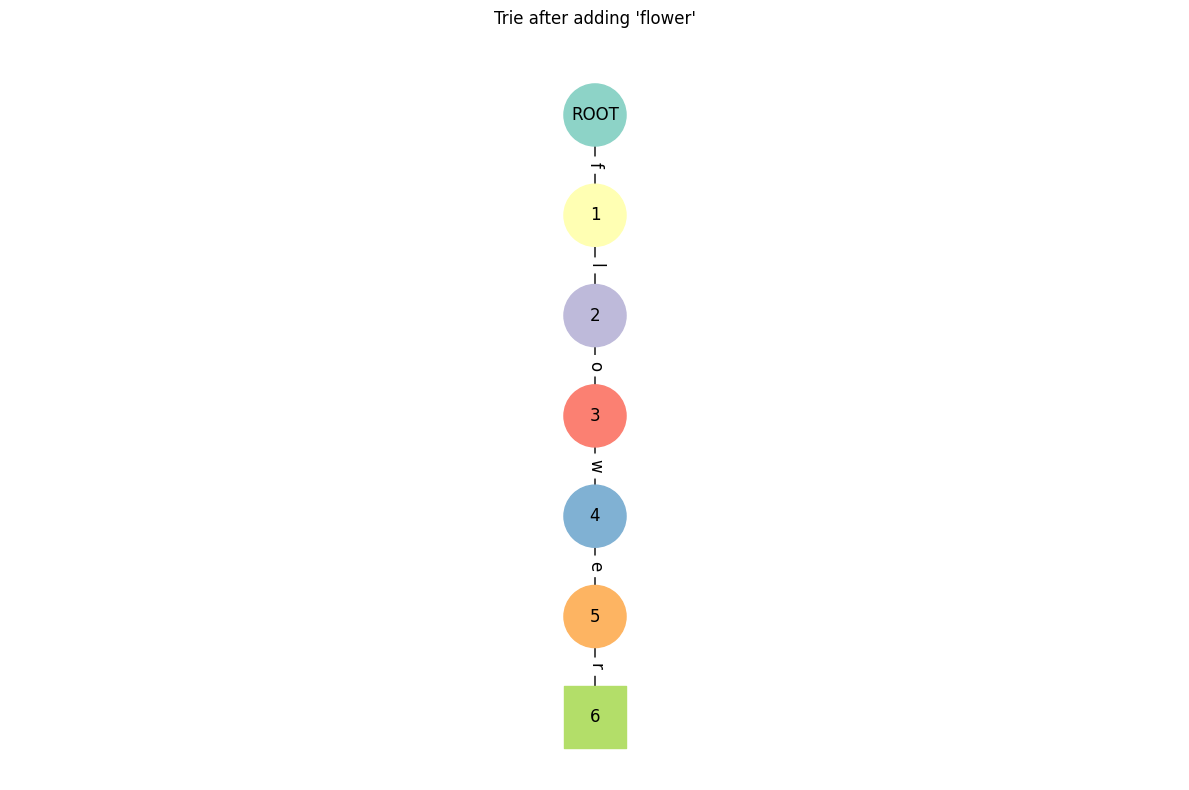


Adding word to trie: flow


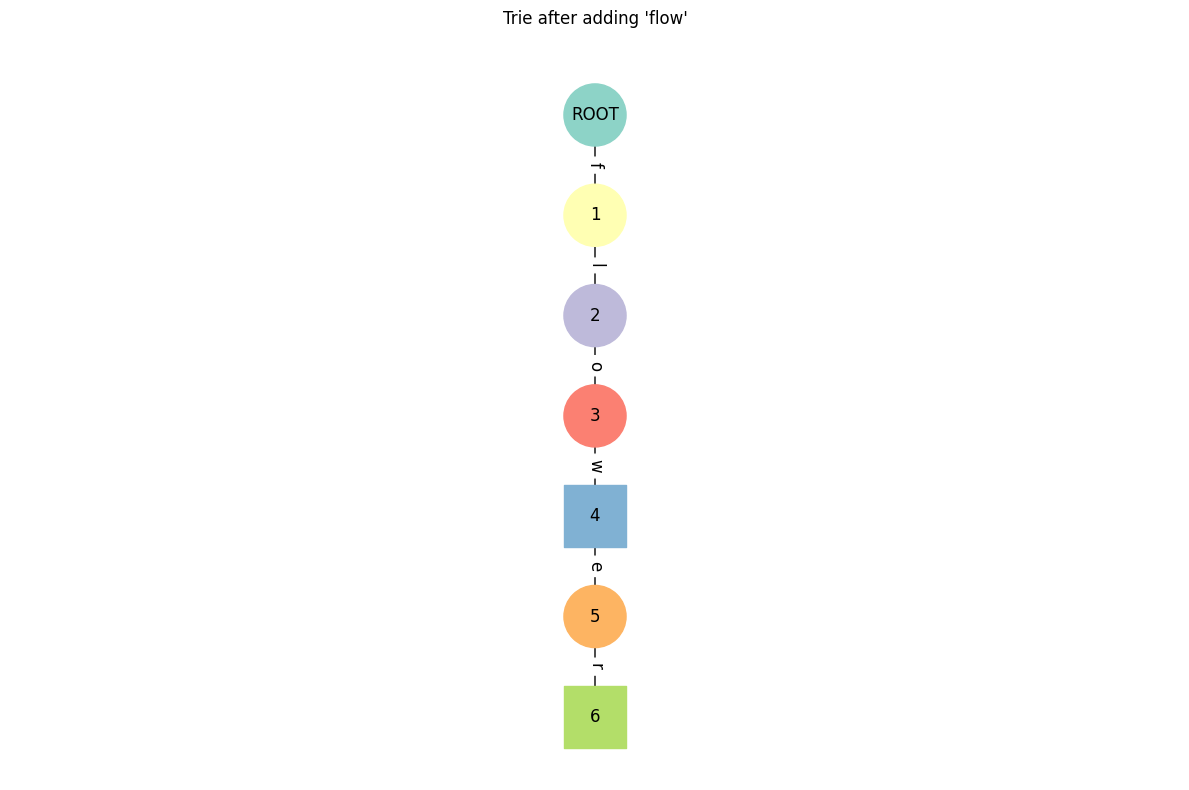


Adding word to trie: flight


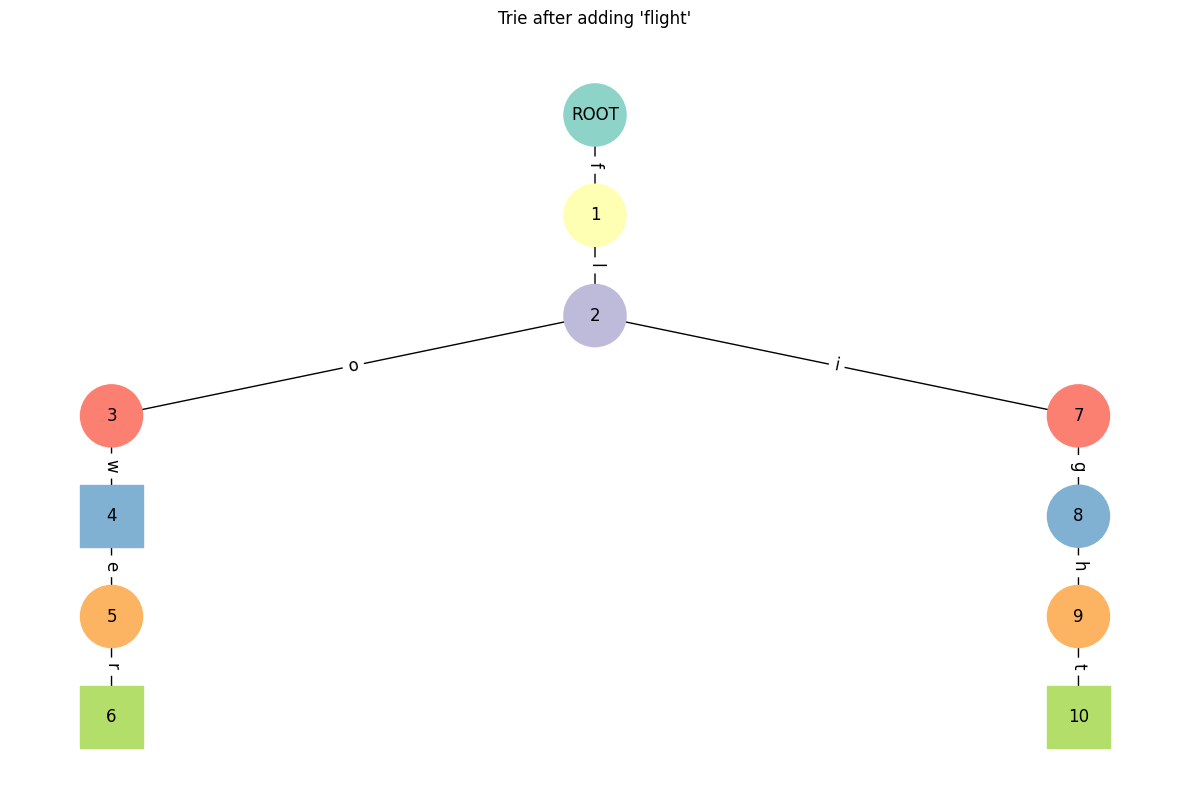


Searching for longest common prefix...
Following single path: 'f'
  Following single path: 'l'
    Found branching point at 'fl' with 2 children:
    - Branch: 'o'
    - Branch: 'i'

Final Trie structure:


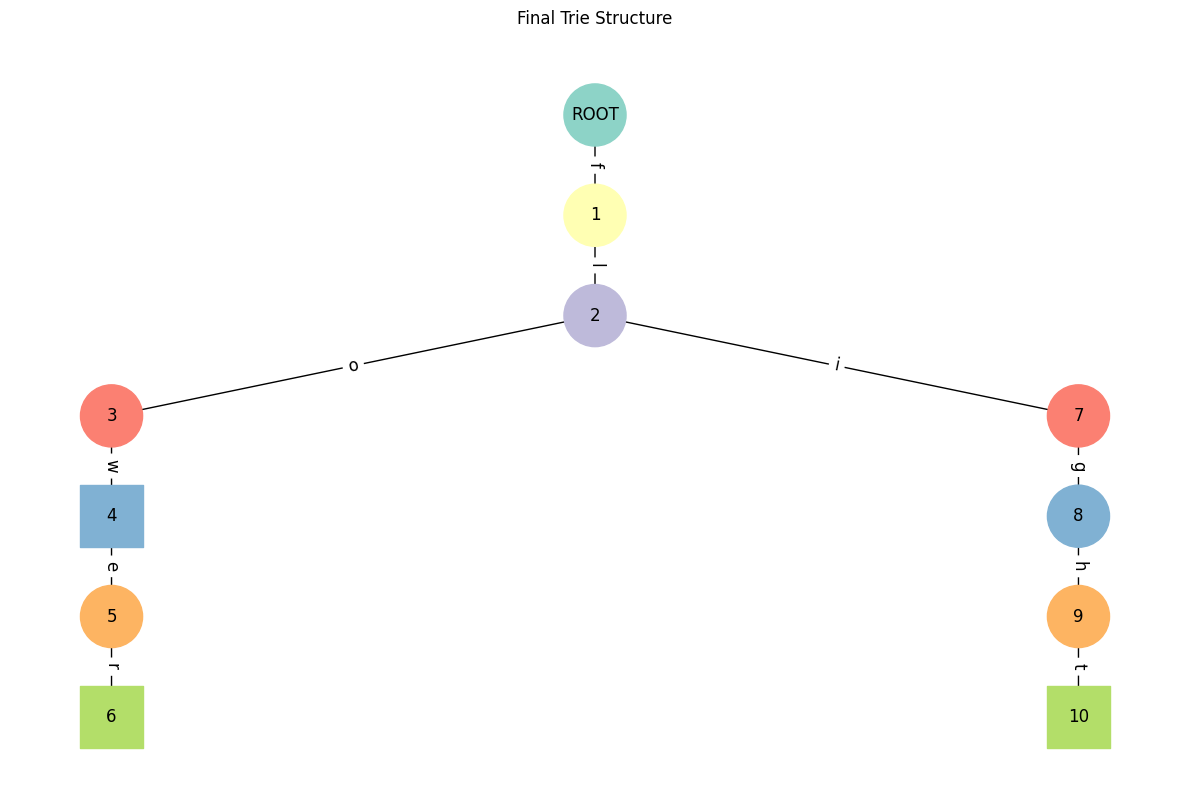


Found longest common prefix: 'fl'


Final result: 'fl'

==================== Longer Common Prefix ====================
Input strings: ['interspecies', 'interstellar', 'interstate']

Processing input strings: ['interspecies', 'interstellar', 'interstate']

Adding word to trie: interspecies


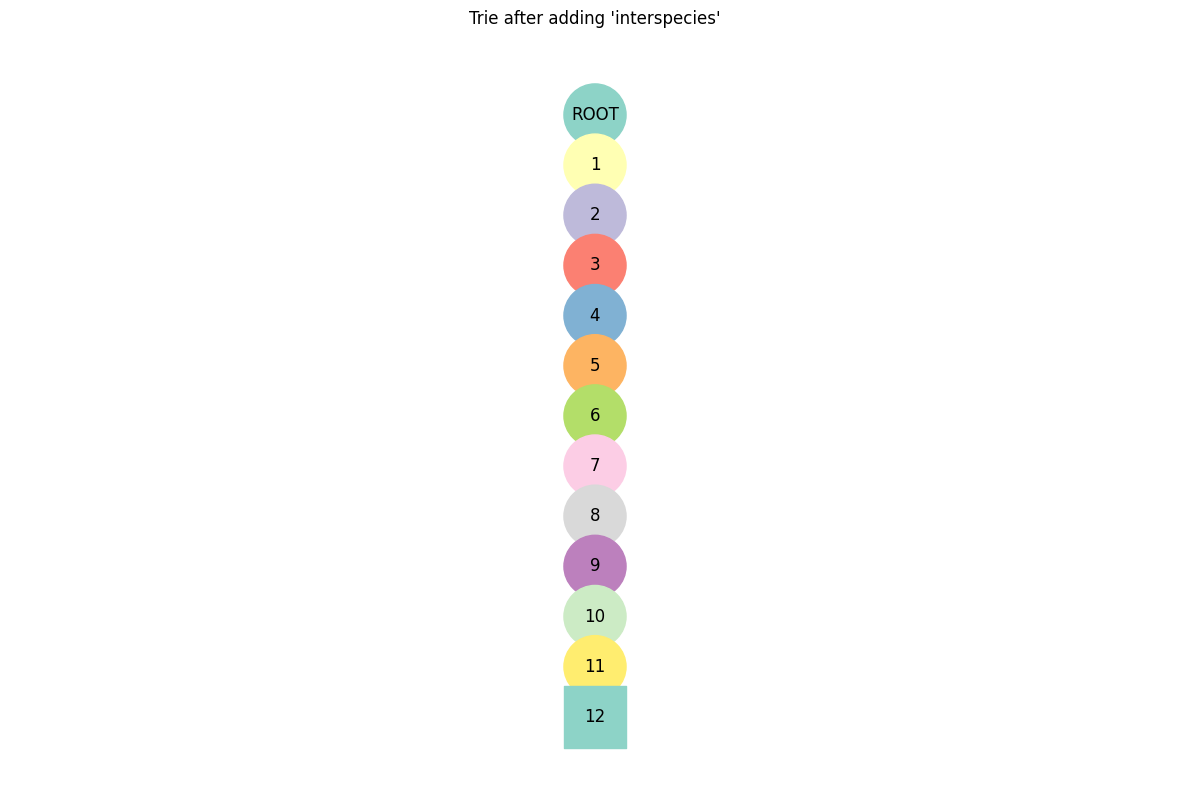


Adding word to trie: interstellar


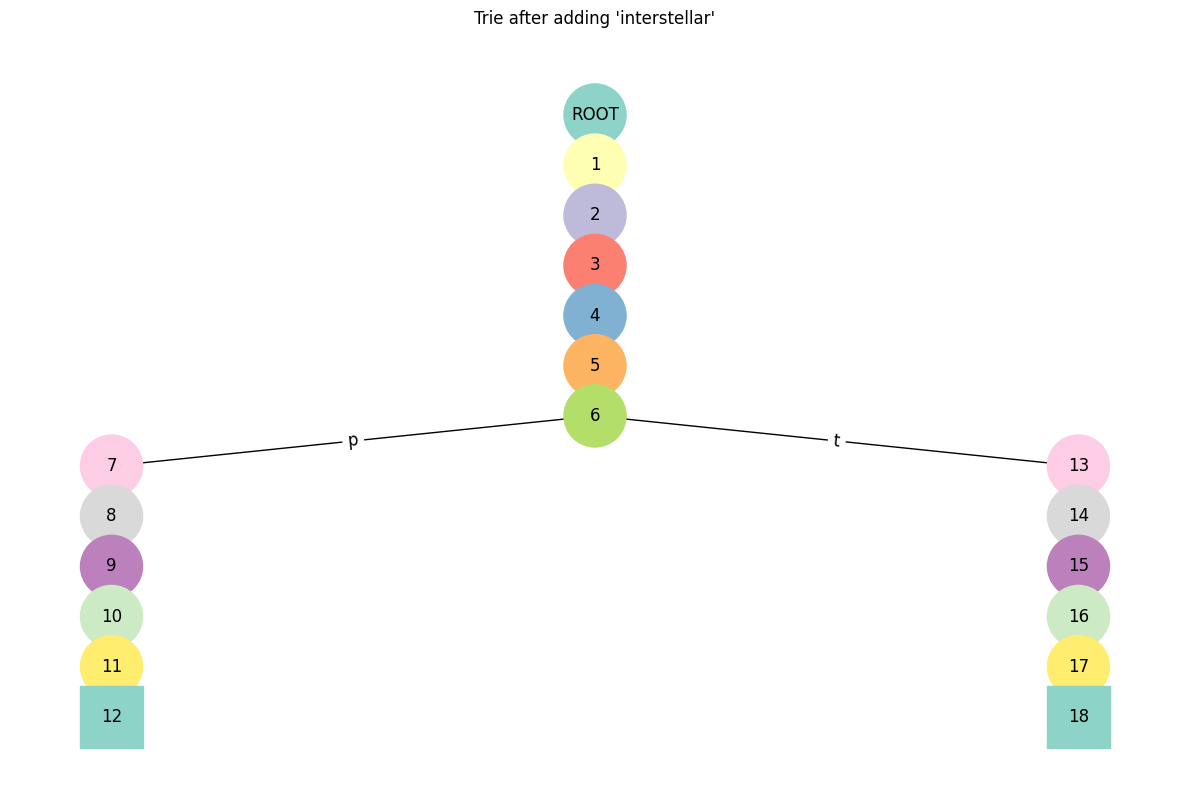


Adding word to trie: interstate


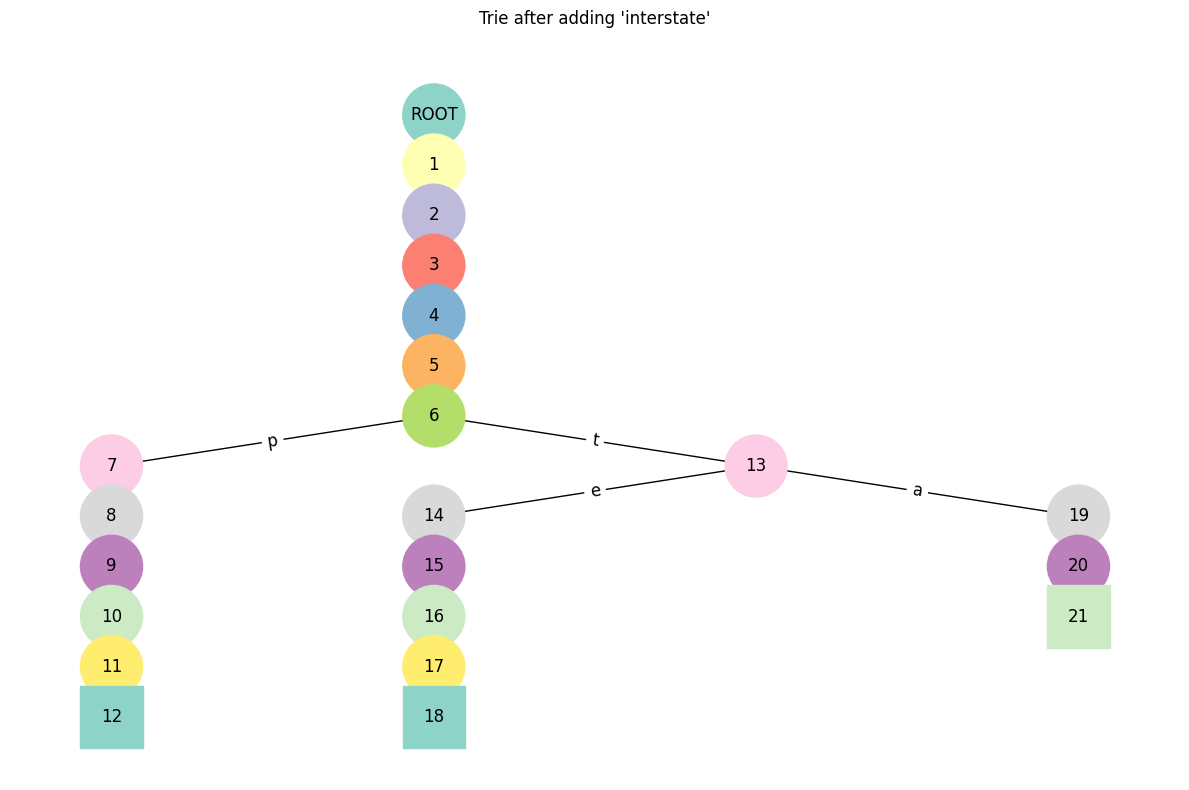


Searching for longest common prefix...
Following single path: 'i'
  Following single path: 'n'
    Following single path: 't'
      Following single path: 'e'
        Following single path: 'r'
          Following single path: 's'
            Found branching point at 'inters' with 2 children:
            - Branch: 'p'
            - Branch: 't'

Final Trie structure:


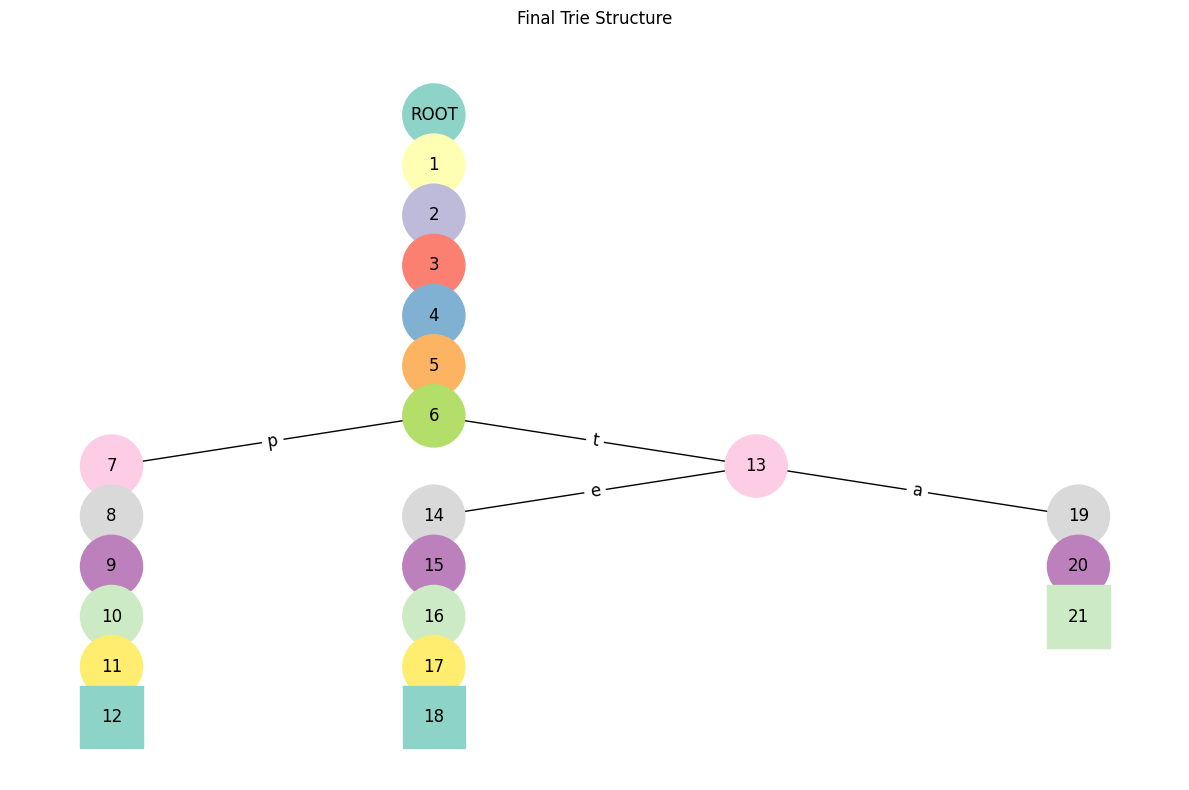


Found longest common prefix: 'inters'


Final result: 'inters'

==================== Complete Word as Prefix ====================
Input strings: ['cat', 'catalog', 'category']

Processing input strings: ['cat', 'catalog', 'category']

Adding word to trie: cat


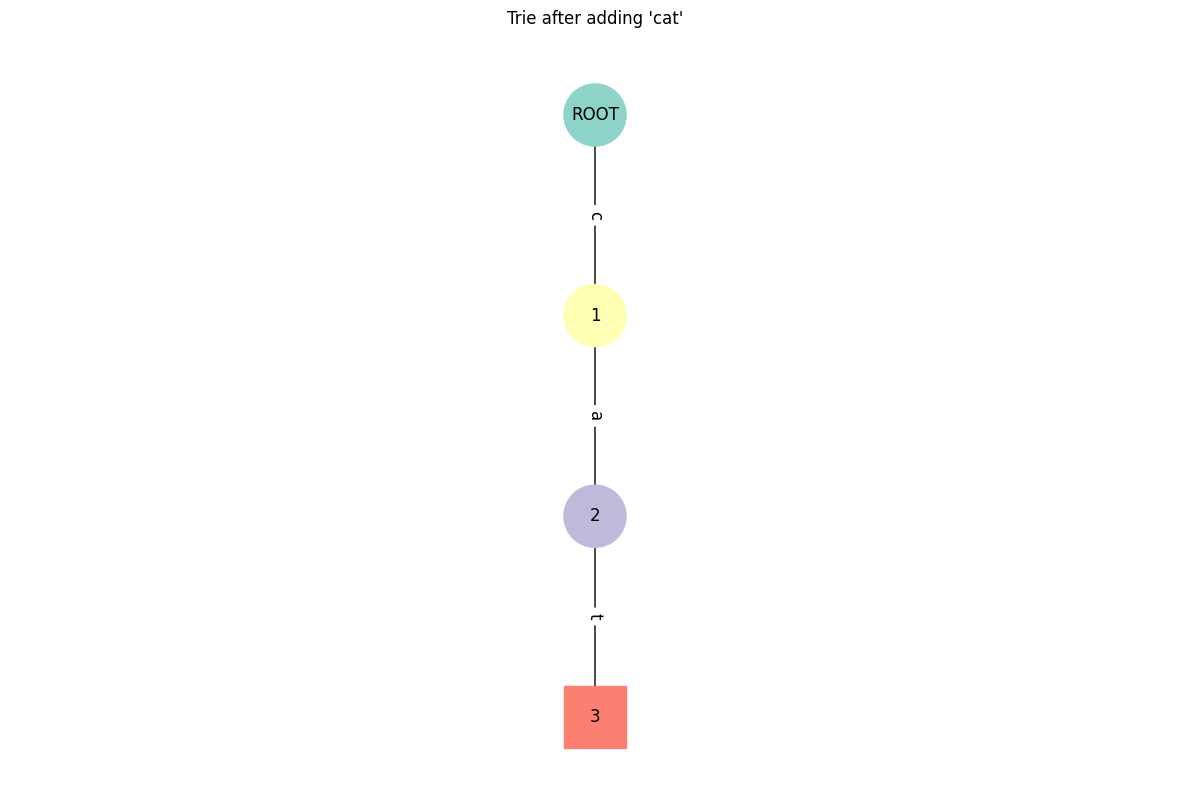


Adding word to trie: catalog


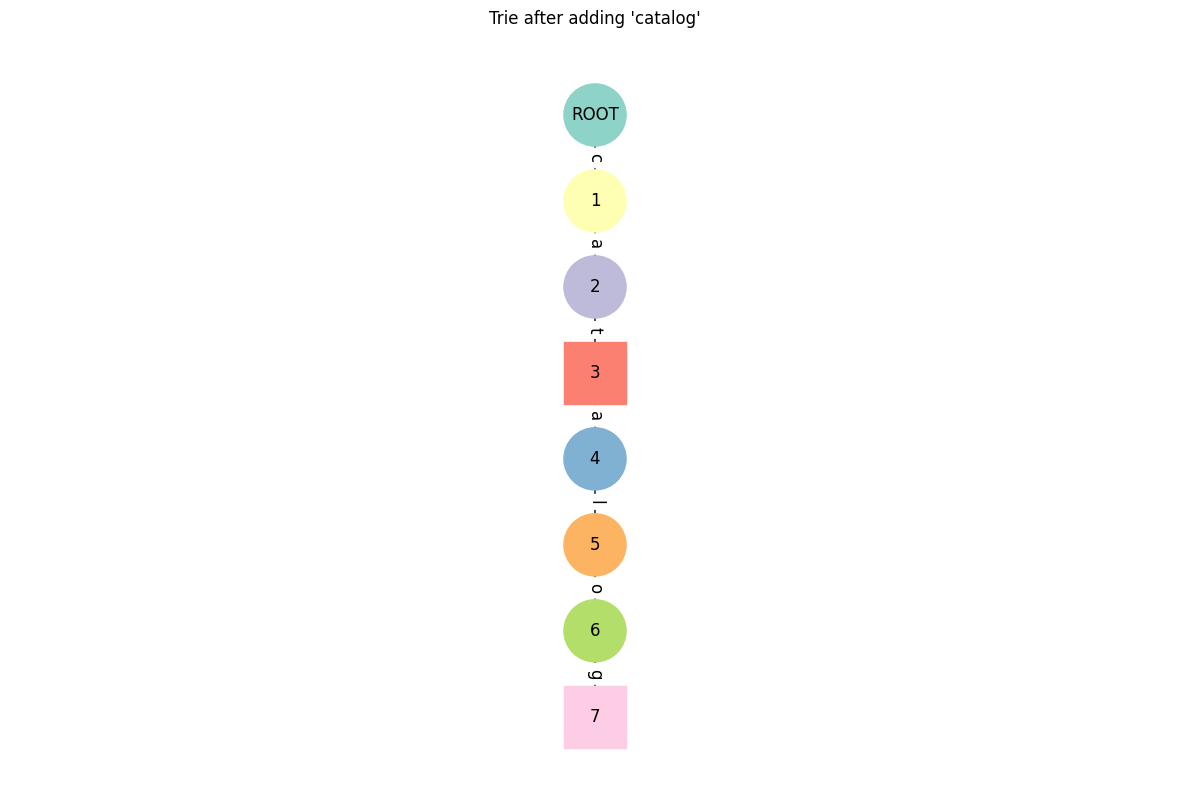


Adding word to trie: category


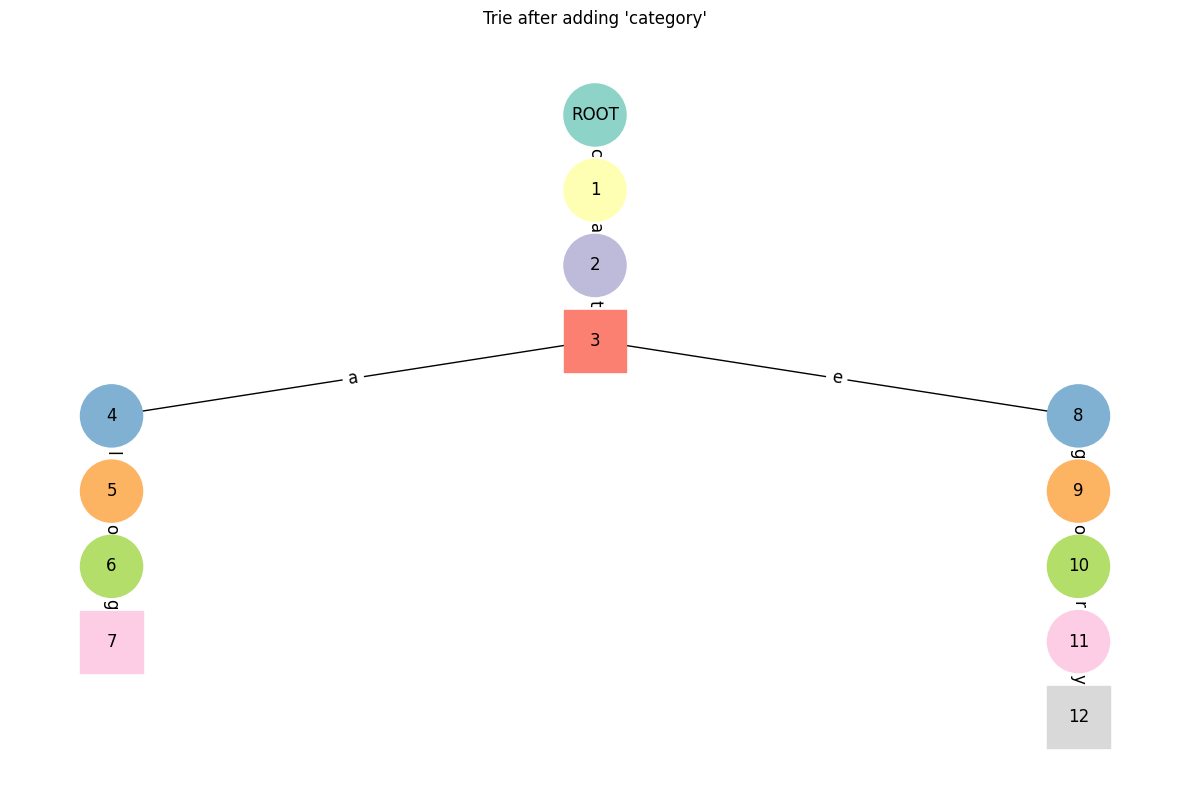


Searching for longest common prefix...
Following single path: 'c'
  Following single path: 'a'
    Following single path: 't'
      Found word end at: 'cat'

Final Trie structure:


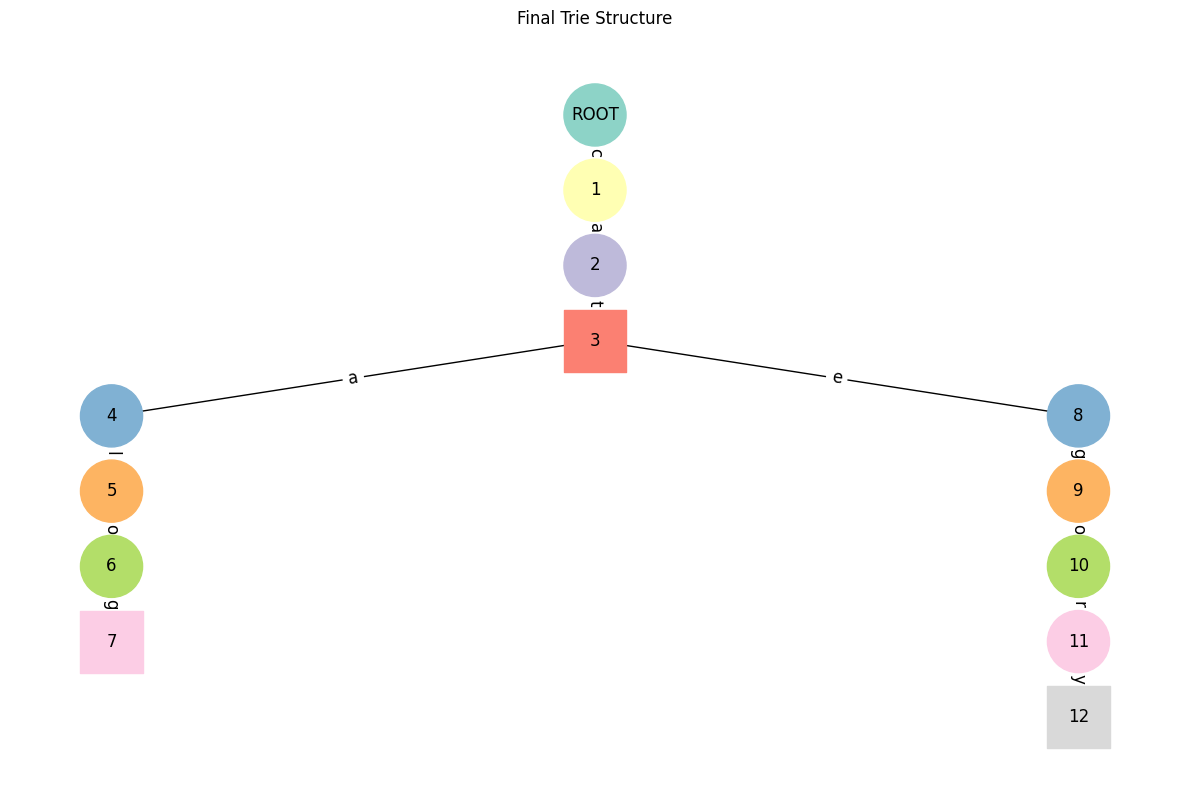


Found longest common prefix: 'cat'


Final result: 'cat'


In [14]:


class LongestCommonWord(Trie):
    def __init__(self):
        super().__init__()
        self.visualizer = TrieVisualizer()
    
    def find_longest_common_word(self, strings) -> str:
        """
        Finds the longest common prefix among all strings in the input array.
        Includes visualization of the process.
        """
        if not isinstance(strings, list):
            print(f"Error: Expected list input, got {type(strings)}")
            raise TypeError("Input must be a list of strings")
            
        if not strings:
            print("Input list is empty, returning empty string")
            return ""
            
        non_strings = [str(x) for x in strings if not isinstance(x, str)]
        if non_strings:
            print(f"Error: Found non-string elements: {non_strings}")
            raise TypeError("All elements must be strings")
            
        print(f"\nProcessing input strings: {strings}")
        
        # Build trie and visualize progress
        for i, word in enumerate(strings):
            print(f"\nAdding word to trie: {word}")
            self.put(word, i)
            # Visualize after each word
            self.visualizer.visualize_trie(
                self, 
                f"Trie after adding '{word}'"
            )
            
        def _find_common_prefix(node, prefix, depth=0):
            indent = "  " * depth
            
            if node.is_end():
                print(f"{indent}Found word end at: '{prefix}'")
                return prefix
                
            child_count = len(node.get_children())
            if child_count > 1:
                print(f"{indent}Found branching point at '{prefix}' with {child_count} children:")
                for char in node.get_children().keys():
                    print(f"{indent}- Branch: '{char}'")
                return prefix
                
            if child_count == 1:
                char, child = next(iter(node.get_children().items()))
                print(f"{indent}Following single path: '{char}'")
                return _find_common_prefix(child, prefix + char, depth + 1)
                
            print(f"{indent}No children found at '{prefix}'")
            return prefix
            
        print("\nSearching for longest common prefix...")
        result = _find_common_prefix(self.get_root(), "")
        
        # Final visualization
        print("\nFinal Trie structure:")
        self.visualizer.visualize_trie(self, "Final Trie Structure")
        
        print(f"\nFound longest common prefix: '{result}'\n")
        return result

if __name__ == "__main__":
    # Example usage
    examples = [
        ("Basic Example", ["flower", "flow", "flight"]),
        ("Longer Common Prefix", ["interspecies", "interstellar", "interstate"]),
        ("Complete Word as Prefix", ["cat", "catalog", "category"])
    ]
    
    for name, strings in examples:
        print(f"\n{'='*20} {name} {'='*20}")
        print(f"Input strings: {strings}")
        
        trie = LongestCommonWord()
        result = trie.find_longest_common_word(strings)
        
        print(f"\nFinal result: '{result}'")
        print("="*60)